# Plotting

## One-dimensional data (e.g. time series, vertical profiles,...)

```julia
using PyPlot
plot(x,y,format)
```

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


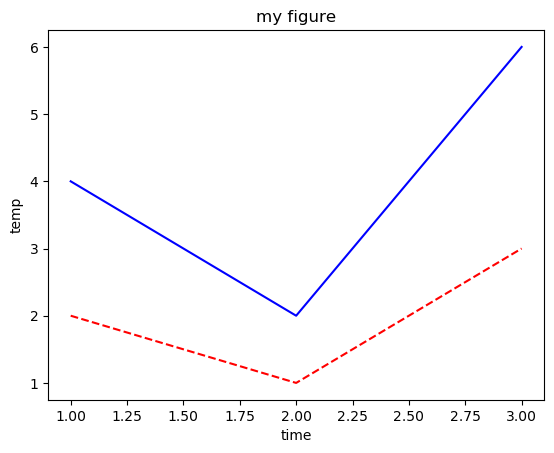

In [2]:
using PyPlot
clf() # clear figure
x = [1,2,3]
y = [2,1,3]
using PyPlot
plot(x,y,"r--")
plot(x,2*y,"b-")
title("my figure")
xlabel("time")
ylabel("temp");

* Draws a line with the values in x and in y as x- (horizontal) and y-axis (vertical) respectively. With format one can specify the color (blue ("b"), red ("r"), green ("g"), ...) and style of the line (solid (-), dots (.), dotted (:), ...)

Download these data (sea level time series in the West Florida Shelf, in the 6th column) and make a plot, with a solid line in green. The date can be derived from the 5 first columns, using the command datenum. Include labels with the variable units (meters) and the date, and add a legend.

At which date did the sea level reach its maximum? 

## Two-dimensional data (e.g. horizontal sections, ...)


```julia
pcolor(x,y,v)
```

* The value within a rectangle defined by x and y is drawn by color depending on v and on the color map. 

* show the color bar

```julia
colorbar()
```

* show color bar relating values and colors

* Missing values are unfortunatetly not directly handeld by `PyPlot'.

## Annotating your graphs


* give a title to the current figure

```julia
title("my figure")
```

* give a name to the x- and y-axis

```julia
xlabel("my label"), ylabel("my label")
```

* Save the figure as a PNG file. For a EPS file use the file extension. Do not save images in JPEG as it degrades the quality of the figure.

```julia
savefig("file.png")
```

# Animations

If some package cannot be loaded, then you might need to install them with `using Pkg; Pkg.add("PACKAGE")`.

In [8]:
using ImageIO, Images, VideoIO, FileIO, Printf, PyPlot


data =  [sin(x)*sin(y)*cos(t) for x = 0:0.1:2π, y = 0:0.1:2π, t = 0:0.1:2π];
filenames = [@sprintf("image_frame_%04d.png",n) for n = 1:size(data,3)];

Make the images

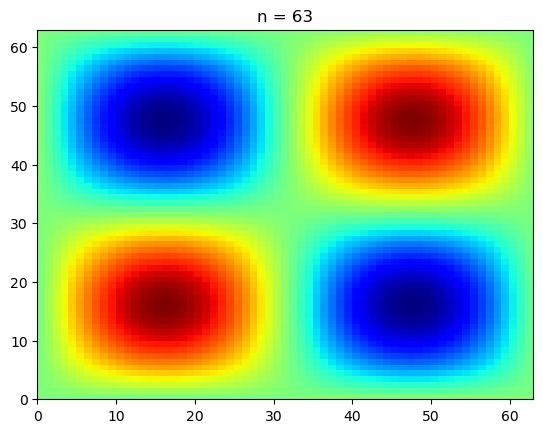

In [5]:
for n = 1:size(data,3)
  pcolor(data[:,:,n]', cmap="jet");
  title("n = $n");
  clim(-1,1);
  savefig(filenames[n])
end

Load all images as RGB (as arrays of red-green-blue color values)

In [6]:
imgstack = [RGB.(load(filename)) for filename in filenames];

Save as a mp4 file with 10 frames per seconds

In [7]:
encodevideo("video.mp4",imgstack,framerate = 10);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Video file saved: /home/abarth/Lectures/JuliaTutorial/video.mp4
└ @ VideoIO /home/abarth/.julia/packages/VideoIO/hkeYD/src/encoding.jl:228
┌ Info: frame=   63 fps=0.0 q=-1.0 Lsize=     171kB time=00:00:06.00 bitrate= 233.5kbits/s speed=3.41e+03x    
└ @ VideoIO /home/abarth/.julia/packages/VideoIO/hkeYD/src/encoding.jl:229
┌ Info: video:170kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.616610%
└ @ VideoIO /home/abarth/.julia/packages/VideoIO/hkeYD/src/encoding.jl:230


You can now open the file `video.mp4` with your file manager.